In [ ]:
# telecom chern data 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [12]:
df = pd.read_csv(r"C:\Users\sahil\Downloads\Preprocessed_data.csv")

In [13]:
df.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,...,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,...,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,...,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,...,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,...,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


In [14]:
x = df.drop('Customer Status',axis=1)
y = df['Customer Status']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                test_size=0.2,
                                                random_state=0)
print(x_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


In [16]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(x_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [17]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
y_predict = RF.predict(x_test)

In [19]:
# metrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_predict)*100,2)
f1_RF=round(f1_score(y_test,y_predict),2)
precision_RF=round(precision_score(y_test,y_predict),2)
recall_RF=round(recall_score(y_test,y_predict),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 82.94
F1 is: 0.88
Precision is: 0.85
Recall is: 0.91


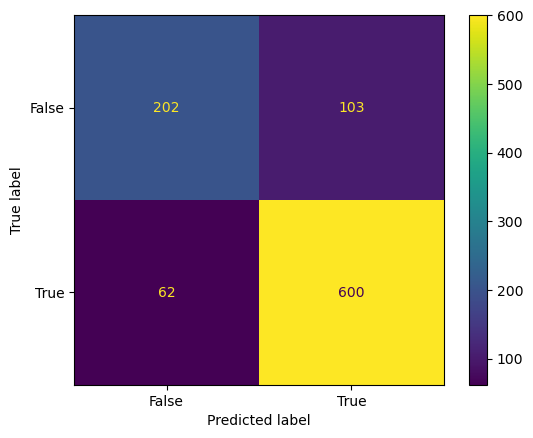

True negative: 202
False postive: 103
False negative: 62
True postive: 600


In [20]:
# matrix [plot]
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_predict)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

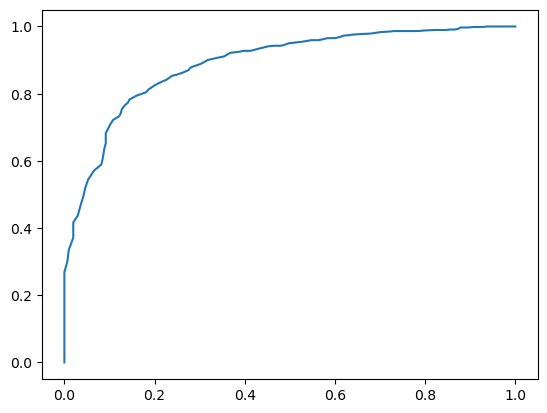

In [25]:
# auc roc curve 
y_RF_pred_prob=RF.predict_proba(x_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()